In [129]:
import pandas as pd
import numpy as np

In [130]:
from sklearn.datasets import make_classification

In [131]:
X, y = make_classification(n_samples=15, n_features=5,
                           class_sep=0.2, weights=[0.6], random_state=13)

In [132]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4
0,-1.073506,-1.283661,0.856042,-0.583981,0.710975
1,-0.980851,-0.006562,1.582226,-1.123666,0.564654
2,0.567035,0.142115,-0.819807,0.579614,1.350306
3,0.615307,-0.390461,-1.263236,0.904533,-0.057532
4,-0.803269,-1.578728,0.216467,-0.124194,0.453159


In [133]:
df['y_true'] = y

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr = LogisticRegression()
lr.fit(df.drop('y_true', axis=1), df['y_true'])

LogisticRegression()

In [136]:
lr.predict_proba(df.drop('y_true', axis=1))

array([[0.90283689, 0.09716311],
       [0.8091633 , 0.1908367 ],
       [0.7027575 , 0.2972425 ],
       [0.50176424, 0.49823576],
       [0.87857297, 0.12142703],
       [0.89606107, 0.10393893],
       [0.27763423, 0.72236577],
       [0.5093406 , 0.4906594 ],
       [0.1901822 , 0.8098178 ],
       [0.62636081, 0.37363919],
       [0.59205329, 0.40794671],
       [0.81407922, 0.18592078],
       [0.30351923, 0.69648077],
       [0.52965489, 0.47034511],
       [0.46604036, 0.53395964]])

In [137]:
df['y_score'] = lr.predict_proba(df.drop('y_true', axis=1))[:, 1]

In [138]:
df['y_pred'] = lr.predict(df.drop(['y_score', 'y_true'], axis=1))

In [139]:
df

,0,1,2,3,4,y_true,y_score,y_pred
0,-1.073506,-1.283661,0.856042,-0.583981,0.710975,0,0.097163,0
1,-0.980851,-0.006562,1.582226,-1.123666,0.564654,0,0.190837,0
2,0.567035,0.142115,-0.819807,0.579614,1.350306,0,0.297242,0
3,0.615307,-0.390461,-1.263236,0.904533,-0.057532,0,0.498236,0
4,-0.803269,-1.578728,0.216467,-0.124194,0.453159,0,0.121427,0
5,-0.445392,0.014703,0.730598,-0.519188,2.015221,0,0.103939,0
6,0.397211,0.488377,-0.307551,0.209298,-0.980274,0,0.722366,1
7,0.312567,-0.754283,-1.023068,0.740762,-0.530327,1,0.490659,0
8,0.809029,1.653315,-0.174620,0.093075,-0.511965,1,0.809818,1
9,-0.095033,0.279046,0.345157,-0.250374,0.359532,1,0.373639,0


### Confusion matrix

In [140]:
def get_cm(row):
    if row['y_true'] == 1 and row['y_pred'] == 1:
        return 'tp'
    elif row['y_true'] == 1 and row['y_pred'] == 0:
        return 'fn'
    elif row['y_true'] == 0 and row['y_pred'] == 1:
        return 'fp'
    elif row['y_true'] == 0 and row['y_pred'] == 0:
        return 'tn'

In [141]:
df['cm'] = df.apply(get_cm, axis=1)

In [142]:
df['cm'].value_counts()

tn    8
fn    3
tp    3
fp    1
Name: cm, dtype: int64

In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred']).ravel()

In [145]:
tn, fn, tp, fp

(8, 3, 3, 1)

### ROC-AUC

In [146]:
df['y_score'].nunique()

15

In [147]:
thrs = list(np.sort(df['y_score'].unique()))  # пороги
thrs

[0.09716311123237414,
 0.10393892618842211,
 0.12142702794868054,
 0.18592077787286962,
 0.1908366984317684,
 0.2972424950354351,
 0.37363918731671186,
 0.4079467053279566,
 0.4703451050861696,
 0.49065940271371455,
 0.4982357624094514,
 0.5339596439710482,
 0.6964807729767825,
 0.7223657711706363,
 0.809817798279575]

In [148]:
thrs = [0] + thrs + [1]

In [149]:
thr = thrs[3]
thr

0.12142702794868054

In [150]:
df['y_pred'] = (df['y_score'] > thr) * 1
df['cm'] = df.apply(get_cm, axis=1)
df['cm'].value_counts()

fp    6
tp    6
tn    3
Name: cm, dtype: int64

In [151]:
tp = len(df[(df['y_true'] == 1) & (df['y_pred'] == 1)])
tp

6

In [152]:
tp = len(df[(df['y_true'] == 1) & (df['y_pred'] == 1)])
fp = len(df[(df['y_true'] == 0) & (df['y_pred'] == 1)])
fn = len(df[(df['y_true'] == 1) & (df['y_pred'] == 0)])
tn = len(df[(df['y_true'] == 0) & (df['y_pred'] == 0)])
tp, fp, fn, tn

(6, 6, 0, 3)

In [153]:
res = []
for thr in thrs:
    df['y_pred'] = (df['y_score'] > thr) * 1
    tp = len(df[(df['y_true'] == 1) & (df['y_pred'] == 1)])
    fp = len(df[(df['y_true'] == 0) & (df['y_pred'] == 1)])
    fn = len(df[(df['y_true'] == 1) & (df['y_pred'] == 0)])
    tn = len(df[(df['y_true'] == 0) & (df['y_pred'] == 0)])
    res.append((tp, fp, fn, tn, thr))

In [154]:
cm = pd.DataFrame(res)

In [155]:
cm.columns = ['tp', 'fp', 'fn', 'tn', 'thr']
cm

,tp,fp,fn,tn,thr
0,6,9,0,0,0.000000
1,6,8,0,1,0.097163
2,6,7,0,2,0.103939
3,6,6,0,3,0.121427
4,6,5,0,4,0.185921
5,6,4,0,5,0.190837
6,6,3,0,6,0.297242
7,5,3,1,6,0.373639
8,5,2,1,7,0.407947
9,4,2,2,7,0.470345


In [156]:
cm['tpr'] = cm['tp'] / (cm['tp'] + cm['fn'])    # Все что в реальности было единичкой
cm['fpr'] = cm['fp'] / (cm['fp'] + cm['tn'])    # Все что в реальности было ноликом

In [157]:
cm

,tp,fp,fn,tn,thr,tpr,fpr
0,6,9,0,0,0.000000,1.000000,1.000000
1,6,8,0,1,0.097163,1.000000,0.888889
2,6,7,0,2,0.103939,1.000000,0.777778
3,6,6,0,3,0.121427,1.000000,0.666667
4,6,5,0,4,0.185921,1.000000,0.555556
5,6,4,0,5,0.190837,1.000000,0.444444
6,6,3,0,6,0.297242,1.000000,0.333333
7,5,3,1,6,0.373639,0.833333,0.333333
8,5,2,1,7,0.407947,0.833333,0.222222
9,4,2,2,7,0.470345,0.666667,0.222222


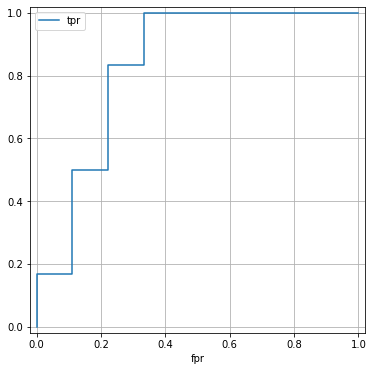

In [158]:
cm.plot(x='fpr', y='tpr', grid=True, figsize=(6,6),
        xlim=(-0.02, 1.02), ylim=(-0.02, 1.02))

In [159]:
from sklearn.metrics import roc_curve

fpr, tpr, thrs = roc_curve(df['y_true'], df['y_score'])

In [160]:
t = pd.DataFrame({'fpr': fpr,
                  'tpr': tpr,
                  'thr': thrs})

In [161]:
t

,fpr,tpr,thr
0,0.000000,0.000000,1.809818
1,0.000000,0.166667,0.809818
2,0.111111,0.166667,0.722366
3,0.111111,0.500000,0.533960
4,0.222222,0.500000,0.498236
5,0.222222,0.833333,0.470345
6,0.333333,0.833333,0.407947
7,0.333333,1.000000,0.373639
8,1.000000,1.000000,0.097163


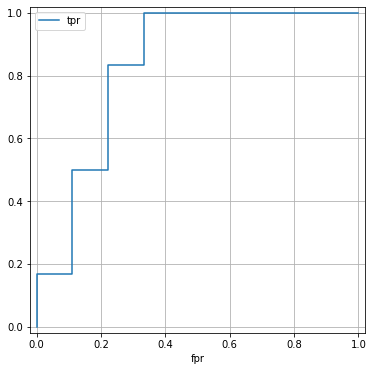

In [162]:
t.plot(x='fpr', y='tpr', grid=True, figsize=(6,6),
        xlim=(-0.02, 1.02), ylim=(-0.02, 1.02))

In [163]:
import matplotlib.pyplot as plt

%matplotlib inline

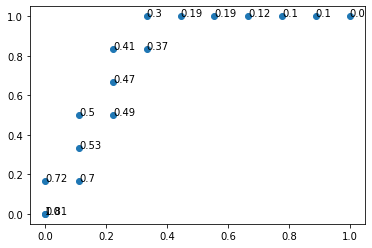

In [168]:
fig, ax = plt.subplots()
ax.scatter(cm['fpr'], cm['tpr'])

for i, txt in enumerate(cm['thr']):
    ax.annotate(round(txt, 2), [cm['fpr'][i], cm['tpr'][i]])

In [169]:
cm['tpr - fpr'] = cm['tpr'] - cm['fpr']

In [170]:
cm.sort_values('tpr - fpr', ascending=False)

,tp,fp,fn,tn,thr,tpr,fpr,tpr - fpr
6,6,3,0,6,0.297242,1.000000,0.333333,0.666667
8,5,2,1,7,0.407947,0.833333,0.222222,0.611111
5,6,4,0,5,0.190837,1.000000,0.444444,0.555556
7,5,3,1,6,0.373639,0.833333,0.333333,0.500000
4,6,5,0,4,0.185921,1.000000,0.555556,0.444444
9,4,2,2,7,0.470345,0.666667,0.222222,0.444444
11,3,1,3,8,0.498236,0.500000,0.111111,0.388889
3,6,6,0,3,0.121427,1.000000,0.666667,0.333333
10,3,2,3,7,0.490659,0.500000,0.222222,0.277778
2,6,7,0,2,0.103939,1.000000,0.777778,0.222222


In [171]:
# Best thr = 0.3

### AUC

In [175]:
cm.sort_values('thr', ascending=False, inplace=True)

In [176]:
cm

,tp,fp,fn,tn,thr,tpr,fpr,tpr - fpr,area
16,0,0,6,9,1.000000,0.000000,0.000000,0.000000,0.0
15,0,0,6,9,0.809818,0.000000,0.000000,0.000000,-0.0
14,1,0,5,9,0.722366,0.166667,0.000000,0.166667,-0.0
13,1,1,5,8,0.696481,0.166667,0.111111,0.055556,-0.0
12,2,1,4,8,0.533960,0.333333,0.111111,0.222222,-0.0
11,3,1,3,8,0.498236,0.500000,0.111111,0.388889,-0.0
10,3,2,3,7,0.490659,0.500000,0.222222,0.277778,-0.0
9,4,2,2,7,0.470345,0.666667,0.222222,0.444444,-0.0
8,5,2,1,7,0.407947,0.833333,0.222222,0.611111,-0.0
7,5,3,1,6,0.373639,0.833333,0.333333,0.500000,-0.0


In [181]:
cm['area'] = 1/2 * cm['fpr'].diff() * (cm['tpr'] + cm['tpr'].shift())

In [182]:
cm

,tp,fp,fn,tn,thr,tpr,fpr,tpr - fpr,area
16,0,0,6,9,1.000000,0.000000,0.000000,0.000000,NaN
15,0,0,6,9,0.809818,0.000000,0.000000,0.000000,0.000000
14,1,0,5,9,0.722366,0.166667,0.000000,0.166667,0.000000
13,1,1,5,8,0.696481,0.166667,0.111111,0.055556,0.018519
12,2,1,4,8,0.533960,0.333333,0.111111,0.222222,0.000000
11,3,1,3,8,0.498236,0.500000,0.111111,0.388889,0.000000
10,3,2,3,7,0.490659,0.500000,0.222222,0.277778,0.055556
9,4,2,2,7,0.470345,0.666667,0.222222,0.444444,0.000000
8,5,2,1,7,0.407947,0.833333,0.222222,0.611111,0.000000
7,5,3,1,6,0.373639,0.833333,0.333333,0.500000,0.092593


In [183]:
cm['area'].sum()

0.8333333333333334

In [184]:
from sklearn.metrics import roc_auc_score

In [186]:
roc_auc_score(df['y_true'], df['y_score'])

0.8333333333333334

In [187]:
from sklearn.metrics import auc

In [188]:
auc(cm['fpr'], cm['tpr'])

0.8333333333333334

In [189]:
np.mean(df[df['y_true'] == 1].sample(10000, replace=True)['y_score'].values >
        df[df['y_true'] == 0].sample(10000, replace=True)['y_score'].values)

0.8321